# 🎬 AI Movie Script Clustering - Grouping Scripts into Genres 🎥
Welcome, data scientists! In this project, your mission is to group similar movie scripts into clusters (genres) using unsupervised learning algorithms. We will follow these steps:

1. Perform Exploratory Data Analysis (EDA) to understand the dataset.
2. Convert text into numerical features using TF-IDF.
3. Apply clustering algorithms and find optimal hyperparameters.
4. Visualize clusters using PCA or t-SNE.

You will use techniques such as K-Means clustering to achieve this goal. Let's dive in! 🚀

## 📦 Install & Import Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

import seaborn as sns
import matplotlib.pyplot as plt
import string

# FOR NLP
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem import SnowballStemmer

In [4]:
import warnings
warnings.filterwarnings("ignore")

## 📂 Load the Dataset

In [6]:
df = pd.read_csv('IMDB_dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


## 📊 Exploratory Data Analysis (EDA) on Dataset

In [9]:
df[df.duplicated()]

,review,sentiment
3537,Quite what the producers of this appalling ada...,negative
3769,My favourite police series of all time turns t...,positive
4391,"Beautiful film, pure Cassavetes style. Gena Ro...",positive
6352,If you liked the Grinch movie... go watch that...,negative
6479,I want very much to believe that the above quo...,negative
...,...,...
49912,This is an incredible piece of drama and power...,positive
49950,This was a very brief episode that appeared in...,negative
49984,Hello it is I Derrick Cannon and I welcome you...,negative
49986,This movie is a disgrace to the Major League F...,negative


In [10]:
df = df[~df.duplicated(keep='first')]
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


## 📝 Preprocess the Text

### Tokenization
Convert text into tokens and clean the data

In [12]:
df['review']

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 49582, dtype: object

In [13]:
# Function to remove HTML tags
import re
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

# Tokenize text
df['review'] = df['review'].apply(remove_html_tags)
df['review']

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. The filming tec...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 49582, dtype: object

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
reviews = df['review'].values
tokenize_phase = [wordpunct_tokenize(i.lower()) for i in reviews]
reviews[0], tokenize_phase[0]

("One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows w

### Stopwords , HTML tags  and Punctuation Removal

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
en_stopwords = stopwords.words('english')
cleaning_phase1 = []

for reviews_tokens in tokenize_phase:
    cleaning_phase1.append([i for i in reviews_tokens if i not in en_stopwords])

tokenize_phase[0], cleaning_phase1[0]

(['one',
  'of',
  'the',
  'other',
  'reviewers',
  'has',
  'mentioned',
  'that',
  'after',
  'watching',
  'just',
  '1',
  'oz',
  'episode',
  'you',
  "'",
  'll',
  'be',
  'hooked',
  '.',
  'they',
  'are',
  'right',
  ',',
  'as',
  'this',
  'is',
  'exactly',
  'what',
  'happened',
  'with',
  'me',
  '.',
  'the',
  'first',
  'thing',
  'that',
  'struck',
  'me',
  'about',
  'oz',
  'was',
  'its',
  'brutality',
  'and',
  'unflinching',
  'scenes',
  'of',
  'violence',
  ',',
  'which',
  'set',
  'in',
  'right',
  'from',
  'the',
  'word',
  'go',
  '.',
  'trust',
  'me',
  ',',
  'this',
  'is',
  'not',
  'a',
  'show',
  'for',
  'the',
  'faint',
  'hearted',
  'or',
  'timid',
  '.',
  'this',
  'show',
  'pulls',
  'no',
  'punches',
  'with',
  'regards',
  'to',
  'drugs',
  ',',
  'sex',
  'or',
  'violence',
  '.',
  'its',
  'is',
  'hardcore',
  ',',
  'in',
  'the',
  'classic',
  'use',
  'of',
  'the',
  'word',
  '.',
  'it',
  'is',
  'calle

In [19]:
to_remove = string.punctuation + '0123456789'
cleaning_phase2 = []

for reviews_tokens in cleaning_phase1:
    cleaning_phase2.append([i for i in reviews_tokens if i not in to_remove])

cleaning_phase1[0], cleaning_phase2[0]

(['one',
  'reviewers',
  'mentioned',
  'watching',
  '1',
  'oz',
  'episode',
  "'",
  'hooked',
  '.',
  'right',
  ',',
  'exactly',
  'happened',
  '.',
  'first',
  'thing',
  'struck',
  'oz',
  'brutality',
  'unflinching',
  'scenes',
  'violence',
  ',',
  'set',
  'right',
  'word',
  'go',
  '.',
  'trust',
  ',',
  'show',
  'faint',
  'hearted',
  'timid',
  '.',
  'show',
  'pulls',
  'punches',
  'regards',
  'drugs',
  ',',
  'sex',
  'violence',
  '.',
  'hardcore',
  ',',
  'classic',
  'use',
  'word',
  '.',
  'called',
  'oz',
  'nickname',
  'given',
  'oswald',
  'maximum',
  'security',
  'state',
  'penitentary',
  '.',
  'focuses',
  'mainly',
  'emerald',
  'city',
  ',',
  'experimental',
  'section',
  'prison',
  'cells',
  'glass',
  'fronts',
  'face',
  'inwards',
  ',',
  'privacy',
  'high',
  'agenda',
  '.',
  'em',
  'city',
  'home',
  'many',
  '..',
  'aryans',
  ',',
  'muslims',
  ',',
  'gangstas',
  ',',
  'latinos',
  ',',
  'christians',

### Stemming (Use Snowball Stemmer)

In [21]:
stemmer = SnowballStemmer(language='english')
stemming_phase = []

for reviews_tokens in cleaning_phase2:
    stemming_phase.append([stemmer.stem(i) for i in reviews_tokens])

cleaning_phase2[0], stemming_phase[0]

(['one',
  'reviewers',
  'mentioned',
  'watching',
  'oz',
  'episode',
  'hooked',
  'right',
  'exactly',
  'happened',
  'first',
  'thing',
  'struck',
  'oz',
  'brutality',
  'unflinching',
  'scenes',
  'violence',
  'set',
  'right',
  'word',
  'go',
  'trust',
  'show',
  'faint',
  'hearted',
  'timid',
  'show',
  'pulls',
  'punches',
  'regards',
  'drugs',
  'sex',
  'violence',
  'hardcore',
  'classic',
  'use',
  'word',
  'called',
  'oz',
  'nickname',
  'given',
  'oswald',
  'maximum',
  'security',
  'state',
  'penitentary',
  'focuses',
  'mainly',
  'emerald',
  'city',
  'experimental',
  'section',
  'prison',
  'cells',
  'glass',
  'fronts',
  'face',
  'inwards',
  'privacy',
  'high',
  'agenda',
  'em',
  'city',
  'home',
  'many',
  '..',
  'aryans',
  'muslims',
  'gangstas',
  'latinos',
  'christians',
  'italians',
  'irish',
  '....',
  'scuffles',
  'death',
  'stares',
  'dodgy',
  'dealings',
  'shady',
  'agreements',
  'never',
  'far',
  

In [22]:
df['stemmed_reviews'] = [' '.join(i) for i in stemming_phase]
df.head()

,review,sentiment,stemmed_reviews
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod hook right ...
1,A wonderful little production. The filming tec...,positive,wonder littl product film techniqu unassum old...
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...


## 🔠 Vectorization using TF-IDF 
Convert Text into Numerical Features using TF-IDF

In [24]:
# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # Limit features to top 1000

# Transform the processed text into TF-IDF features
X_tfidf = vectorizer.fit_transform(df['stemmed_reviews'])

X_tfidf.shape

(49582, 1000)

## 🔍 Apply Clustering Algorithms and Find Optimal Hyperparameters
Determine the Optimal Number of Clusters using the Elbow Method

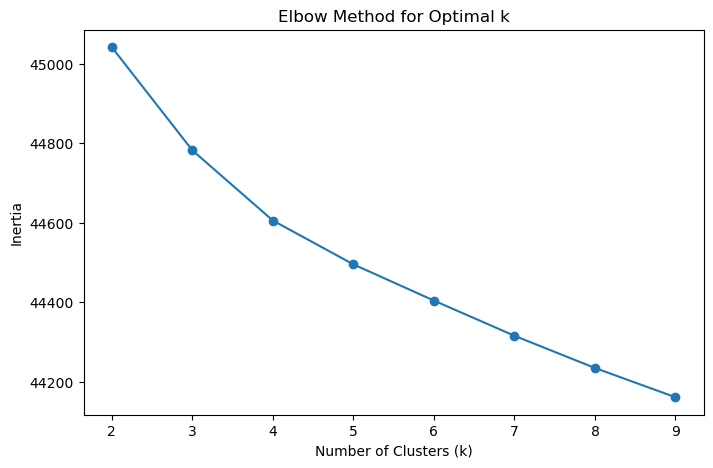

In [26]:
# optimal number of clusters using the Elbow Method
inertia = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_tfidf)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

Apply K-Means Clustering

In [28]:
# Apply K-Means with k=4
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_tfidf)

df[['stemmed_reviews', 'cluster']].head(10)

,stemmed_reviews,cluster
0,one review mention watch oz episod hook right ...,1
1,wonder littl product film techniqu unassum old...,0
2,thought wonder way spend time hot summer weeke...,0
3,basic famili littl boy jake think zombi closet...,0
4,petter mattei love time money visual stun film...,0
5,probabl time favorit movi stori selfless sacri...,3
6,sure would like see resurrect date seahunt ser...,0
7,show amaz fresh innov idea 70 first air first ...,1
8,encourag posit comment film look forward watch...,2
9,like origin gut wrench laughter like movi youn...,3


## Visualize clusters using PCA.

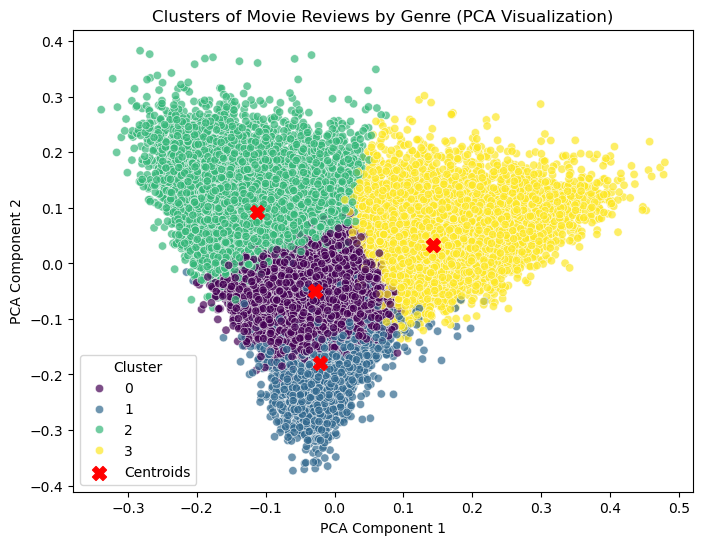

In [30]:
# Apply PCA to reduce TF-IDF features to 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_tfidf.toarray())

# Transform cluster centroids to PCA 
centroids_pca = pca.transform(kmeans.cluster_centers_)  

# Add PCA components to DataFrame
df['pca_1'] = X_pca[:, 0]
df['pca_2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['pca_1'], y=df['pca_2'], hue=df['cluster'], palette='viridis', alpha=0.7)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters of Movie Reviews by Genre (PCA Visualization)')
plt.legend(title='Cluster')
plt.show()

## ✅ DBSCAN Implementation

In [32]:
# Reset the index of the dataframe
df.reset_index(drop=True, inplace=True)

sample_size = 39582
df_sample = df.sample(n=sample_size, random_state=42)
X_pca_sample = X_pca[df_sample.index]

print(X_pca_sample.shape)
print(X_pca.shape)

(39582, 2)
(49582, 2)


In [33]:
dbscan = DBSCAN(eps=0.3, min_samples=10)
df_sample['dbscan_cluster'] = dbscan.fit_predict(X_pca_sample)

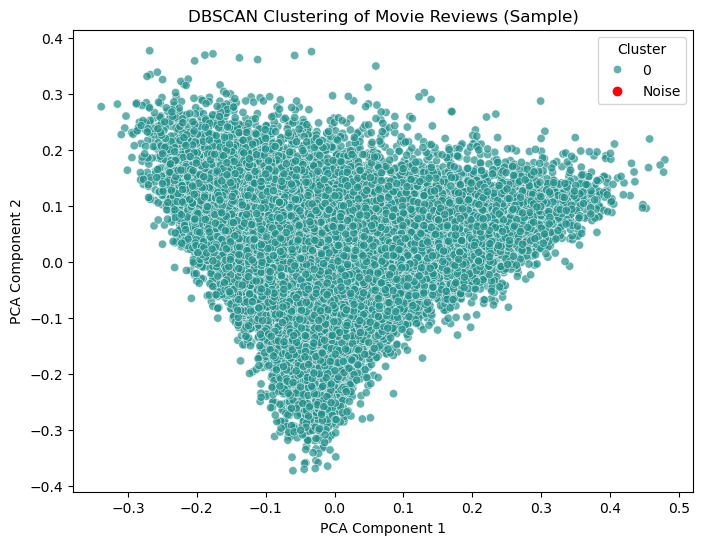

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_sample['pca_1'], y=df_sample['pca_2'], hue=df_sample['dbscan_cluster'], palette='viridis', alpha=0.7)
plt.scatter(df_sample[df_sample['dbscan_cluster'] == -1]['pca_1'], df_sample[df_sample['dbscan_cluster'] == -1]['pca_2'], color='red', label='Noise')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering of Movie Reviews (Sample)')
plt.legend(title='Cluster')
plt.show()

In [35]:
df_sample

,review,sentiment,stemmed_reviews,cluster,pca_1,pca_2,dbscan_cluster
29035,"""Soul Plane"" is a horrible attempt at comedy t...",negative,soul plane horribl attempt comedi appeal peopl...,0,0.064654,-0.011176,0
43282,Guest from the Future tells a fascinating stor...,positive,guest futur tell fascin stori time travel frie...,0,-0.008504,-0.078584,0
38461,"""National Treasure"" (2004) is a thoroughly mis...",negative,nation treasur 2004 thorough misguid hodg podg...,2,-0.122177,0.052290,0
16000,"OK. First said, I just wanted to check whether...",negative,ok first said want check whether movi averag r...,3,0.223063,0.151417,0
5245,"I haven't always been a fan, but the show grew...",positive,alway fan show grew season start see rich show...,1,-0.079794,-0.150138,0
...,...,...,...,...,...,...,...
18066,"As I was reading through the comments, I was s...",positive,read comment surpris come across one said movi...,0,0.004943,0.001232,0
33257,that got destroyed quickly by the poor quality...,negative,got destroy quick poor qualiti act cinematogra...,3,0.036576,0.083561,0
33439,When I think of Return of the Jedi I think epi...,positive,think return jedi think epic yeah ewok interes...,0,0.030570,0.020172,0
39872,"I throughly enjoyed this short, even as a Toro...",positive,through enjoy short even toronto mapl leaf fan...,0,-0.020370,-0.087657,0


# Encode Sentiment Labels

In [37]:
from sklearn.preprocessing import LabelEncoder

# Encode sentiment labels to numerical values
label_encoder = LabelEncoder()
encoded_sentiment = label_encoder.fit_transform(df['sentiment'])
df['encoded_sentiment'] = encoded_sentiment

df[['sentiment', 'encoded_sentiment']].head()

,sentiment,encoded_sentiment
0,positive,1
1,positive,1
2,positive,1
3,negative,0
4,positive,1


In [38]:
encoded_sentiment

array([1, 1, 1, ..., 0, 0, 0])

In [42]:
# Reshape encoded_sentiment to 2D array
encoded_sentiment_2d = encoded_sentiment.reshape(-1, 1)

# Combine TF-IDF features with encoded sentiment
X_combined = np.hstack((X_tfidf.toarray(), encoded_sentiment_2d))
print(X_combined.shape)

(49582, 1001)


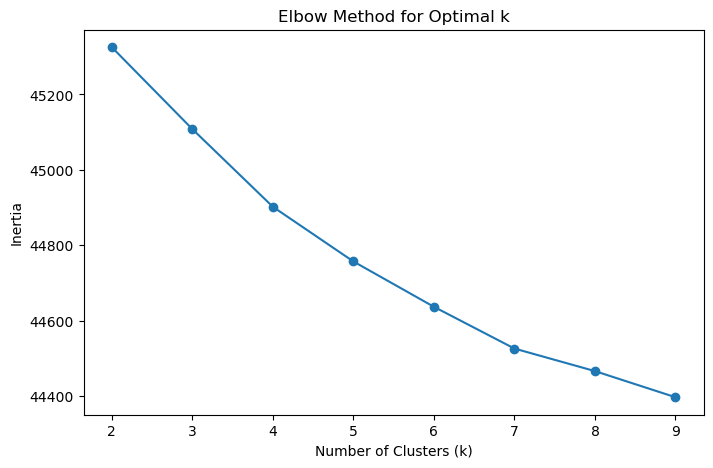

In [44]:
inertia = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_combined)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [48]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_combined)

df[['stemmed_reviews', 'sentiment', 'cluster']].head(10)

,stemmed_reviews,sentiment,cluster
0,one review mention watch oz episod hook right ...,positive,3
1,wonder littl product film techniqu unassum old...,positive,3
2,thought wonder way spend time hot summer weeke...,positive,3
3,basic famili littl boy jake think zombi closet...,negative,0
4,petter mattei love time money visual stun film...,positive,3
5,probabl time favorit movi stori selfless sacri...,positive,1
6,sure would like see resurrect date seahunt ser...,positive,3
7,show amaz fresh innov idea 70 first air first ...,negative,0
8,encourag posit comment film look forward watch...,negative,0
9,like origin gut wrench laughter like movi youn...,positive,1


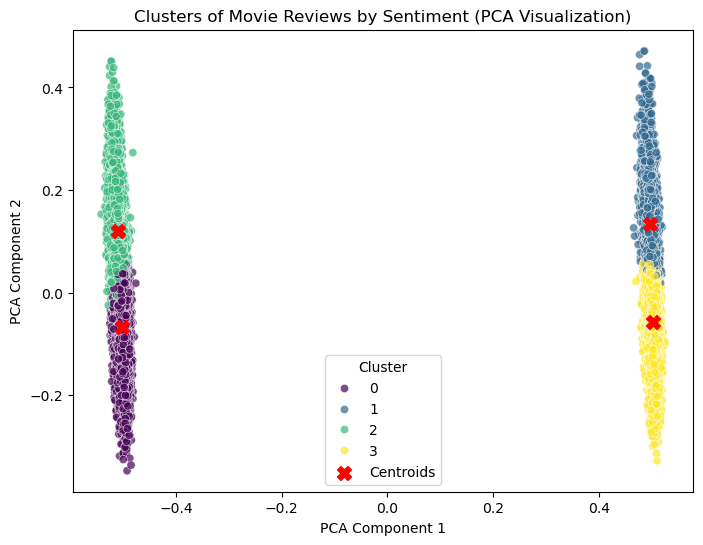

In [49]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_combined)

# Transform cluster centroids to PCA
centroids_pca = pca.transform(kmeans.cluster_centers_)

# PCA components
df['pca_1'] = X_pca[:, 0]
df['pca_2'] = X_pca[:, 1]


plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['pca_1'], y=df['pca_2'], hue=df['cluster'], palette='viridis', alpha=0.7)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters of Movie Reviews by Sentiment (PCA Visualization)')
plt.legend(title='Cluster')
plt.show()